In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import sys
from src.modules import conf, fit, spec, evl, pred
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [4]:
data = fit.load_pcls(
        conf["Athlete"]["name"],
        conf["Athlete"]["activity_type"],
        conf["Paths"]["pcl"],
    )

100%|██████████| 363/363 [00:01<00:00, 339.17it/s]


In [5]:
from src.heuristics import random_shooting
from src.heuristics import genetic_optimization

In [6]:
r_cross = conf['GO']['r_cross']
r_mut = conf['GO']['r_mut']

In [7]:
train_df, test_df = fit.get_train_test_df(data)
test_df, valid_df = fit.get_test_valid_df(test_df)
print(len(train_df),len(test_df),len(valid_df))

542867 125567 3382


In [13]:
_,_,rmse,cols = random_shooting.random_shoot(
                          train_df=train_df,
                          test_df=test_df,
                          hmax=10,
                          endog='enhanced_speed',
                          )

100%|██████████| 10/10 [00:31<00:00,  3.17s/it]


In [14]:
rmse

[2.709218745753617,
 2.8064712132110703,
 3.014094600327243,
 1.767971461456459,
 1.8919520829542884,
 1.4673509888113583,
 1.57709931516689,
 1.552885592982322,
 1.8134567291604533,
 1.9992295500574235]

In [409]:
best, best_eval = genetic_optimization.genetic_algorithm(5, r_cross,r_mut ,cols,train_df,test_df,train_df.columns,'enhanced_speed')

 20%|██        | 1/5 [01:32<06:08, 92.18s/it]

New best: 1.6233622751144297
New best: 1.6178713806602272
New best: 1.5285033575022628


 40%|████      | 2/5 [03:42<05:43, 114.62s/it]

New best: 1.5096339695189234
New best: 1.4459119815973236
New best: 1.4306128586511733


100%|██████████| 5/5 [10:16<00:00, 123.31s/it]


In [26]:
form = random_shooting.get_form(list(cols[rmse.index(np.min(rmse))]), endog='enhanced_speed')
result = spec.ols_form(train_df, form)
pred_ols = pred.predict(valid_df, result)

In [31]:
evl.calc_rmse(valid_df.enhanced_speed,pred_ols)

0.8119464481151623

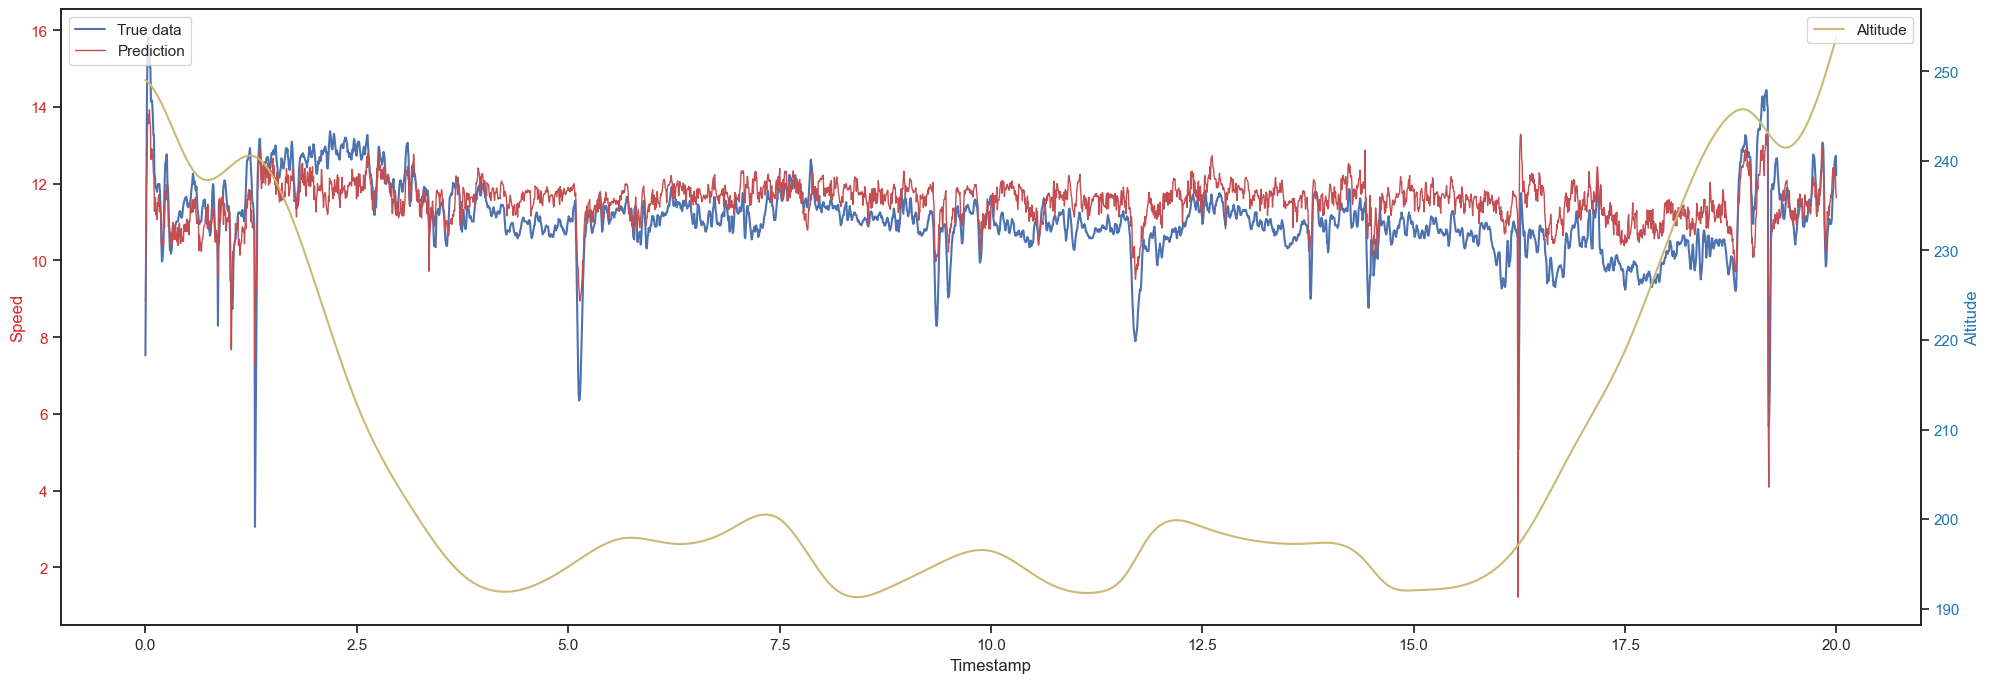

In [28]:
fig = evl.plot(df=valid_df,pred=pred_ols,endog='enhanced_speed')